Notebook em **R** que mostra procedimentos para a obtenção de um **Gráfico BoxPlot** a partir de um exemplo do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)**

<!-- TEASER_END -->

# Exemplos do livro Six Sigma: A Complete Step-by-Step Guide

![Six Sigma: A Complete Step-by-Step Guide](https://raw.githubusercontent.com/vstram/SixSigmaInR/master/book_cover-small.jpg)

## Conteúdo:
* [Exercício](#Exercício)
* [Procedimento](#Procedimento)
* [Solução Alternativa](#Solução-Alternativa)
* [Referências](#Referências)

## Exercício

O exercício (pág 215) apresenta dados coletados do que parece ser um teste de esforço físico. O teste consiste de uma corrida de 1 milha. Os resultados são divididos em duas categorias: adultos e crianças. Os dados são analisados através de um **gráfico BoxPlot**.

## Procedimento

In [1]:
# define um tamanho padrão para o gráfico
options(repr.plot.width=16, repr.plot.height=8) 

### Carregar os dados a partir do arquivo CSV

In [2]:
data <- read.csv("ch14p215.txt", header=TRUE)
data

Children,Adults
<dbl>,<dbl>
9.9,4.1
10.2,4.1
11.6,4.5
12.7,4.6
13.8,4.7
13.4,7.5
13.5,8.3
13.9,8.9
15.2,9.7


### Plotar os dados no gráfico

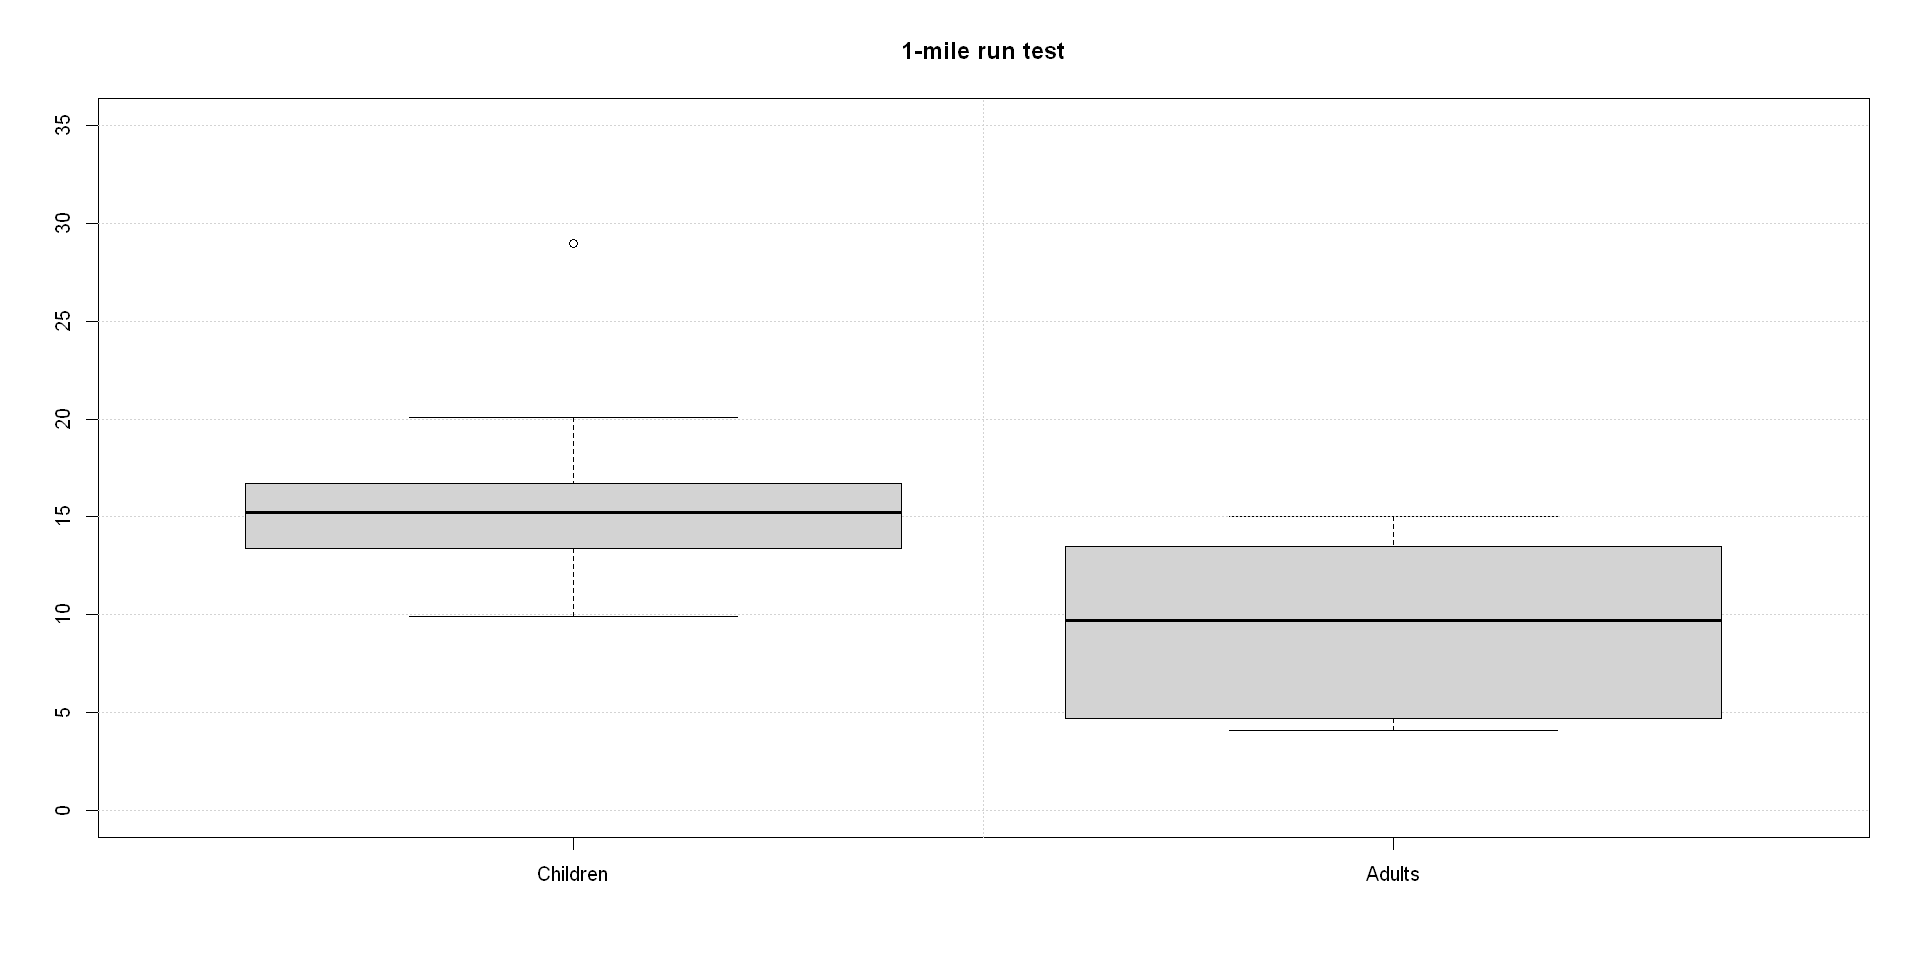

In [3]:
# cria o boxplot
boxplot(
    data$Children, # box referente às crianças 
    data$Adults, # box referente aos adultos
    names = c("Children", "Adults"), # nomes dos boxes
    ylim=c(0, 35), # limites do eixo y
    main="1-mile run test") # título do gráfico

# desenha um grid no gráfico
grid(nx=2, ny=NULL)

## Solução Alternativa

Vamos proceder com outro método de solução para obter o mesmo resultado, desta vez usando a biblioteca `ggplot2`, que permite gerar gráficos com mais qualidade visual. Entretanto, ao usar esta biblioteca, faz-se necessário preparar os dados de forma diferente. Acompanhe os cometários do código abaixo:

In [4]:
# Importa a biblioteca necessária
library(ggplot2)

Usaremos a função `ggplot()` + `geom_boxplot()` para plotar o gráfico. Mas antes disso, é preciso criar um novo data.frame, em que se tem as colunas `time.secs` e `category` a partir dos dados originais.

In [5]:
# Concatena as duas listas em um único array
time.secs <- c(data$Children,data$Adults)

# Cria um array para armazenar a categoria dos atletas
category <- c(
    # Cria uma lista de strings repetidos "Children", "Children", ... igual ao numero de dados
    # coletados para crianças
    replicate(length(data$Children), "Children"), 

    # Cria uma lista de strings repetidos "Adults", "Adults", ... igual ao numero de dados
    # coletados para adultos
    replicate(length(data$Adults), "Adults")
)
data2 <- data.frame(time.secs, category)
data2

time.secs,category
<dbl>,<chr>
9.9,Children
10.2,Children
11.6,Children
12.7,Children
13.8,Children
13.4,Children
13.5,Children
13.9,Children
15.2,Children


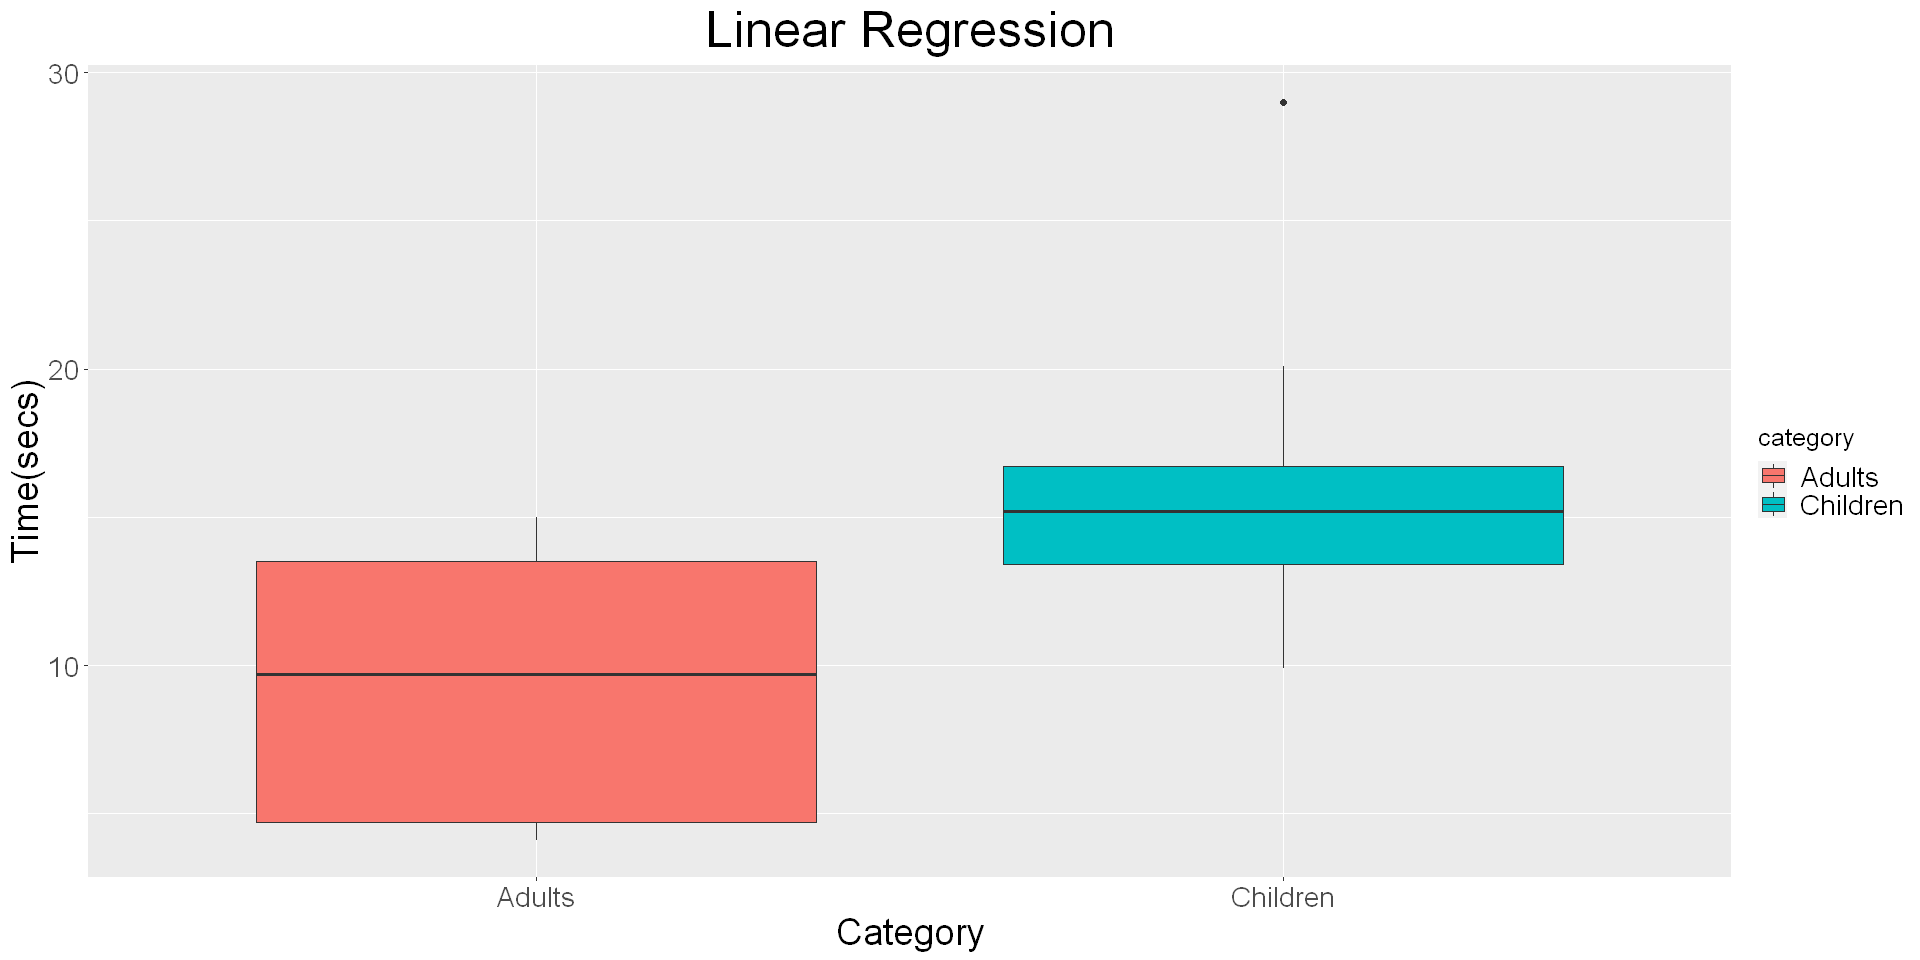

In [6]:
# configurações para o tamanho da fonte dos textos dos gráficos
my.theme <- theme(
    plot.title = element_text(size=30, hjust = 0.5), # define tamanho e alinhamento do título
    axis.title = element_text(size=22), # define tamanho do título do eixo
    axis.text.x = element_text(size=17), # define tamanho das marcas do eixo x
    axis.text.y = element_text(size=17), # define tamanho das marcas do eixo y
    legend.text = element_text(size=17), # define tamanho da legenda
    legend.title = element_text(size=15), # define tamanho do titulo da legenda
)

# configurações para os títulos
my.titles <- labs(
    title="Linear Regression",
    x = "Category", 
    y = "Time(secs)"
)

# Plota os dados do dataframe definido anteriormente em forma de boxplot
# Obs: guardamos o resultado da chamada do ggplot em plt, para usarmos nos exemplos
# mais abaixo
plt <- ggplot( 
    data2, 
    aes(
        x=as.factor(category), 
        y=time.secs, 
        fill=category # colore usando a informação da categoria
    )    
) 
plt + 
geom_boxplot() + 
my.titles + my.theme


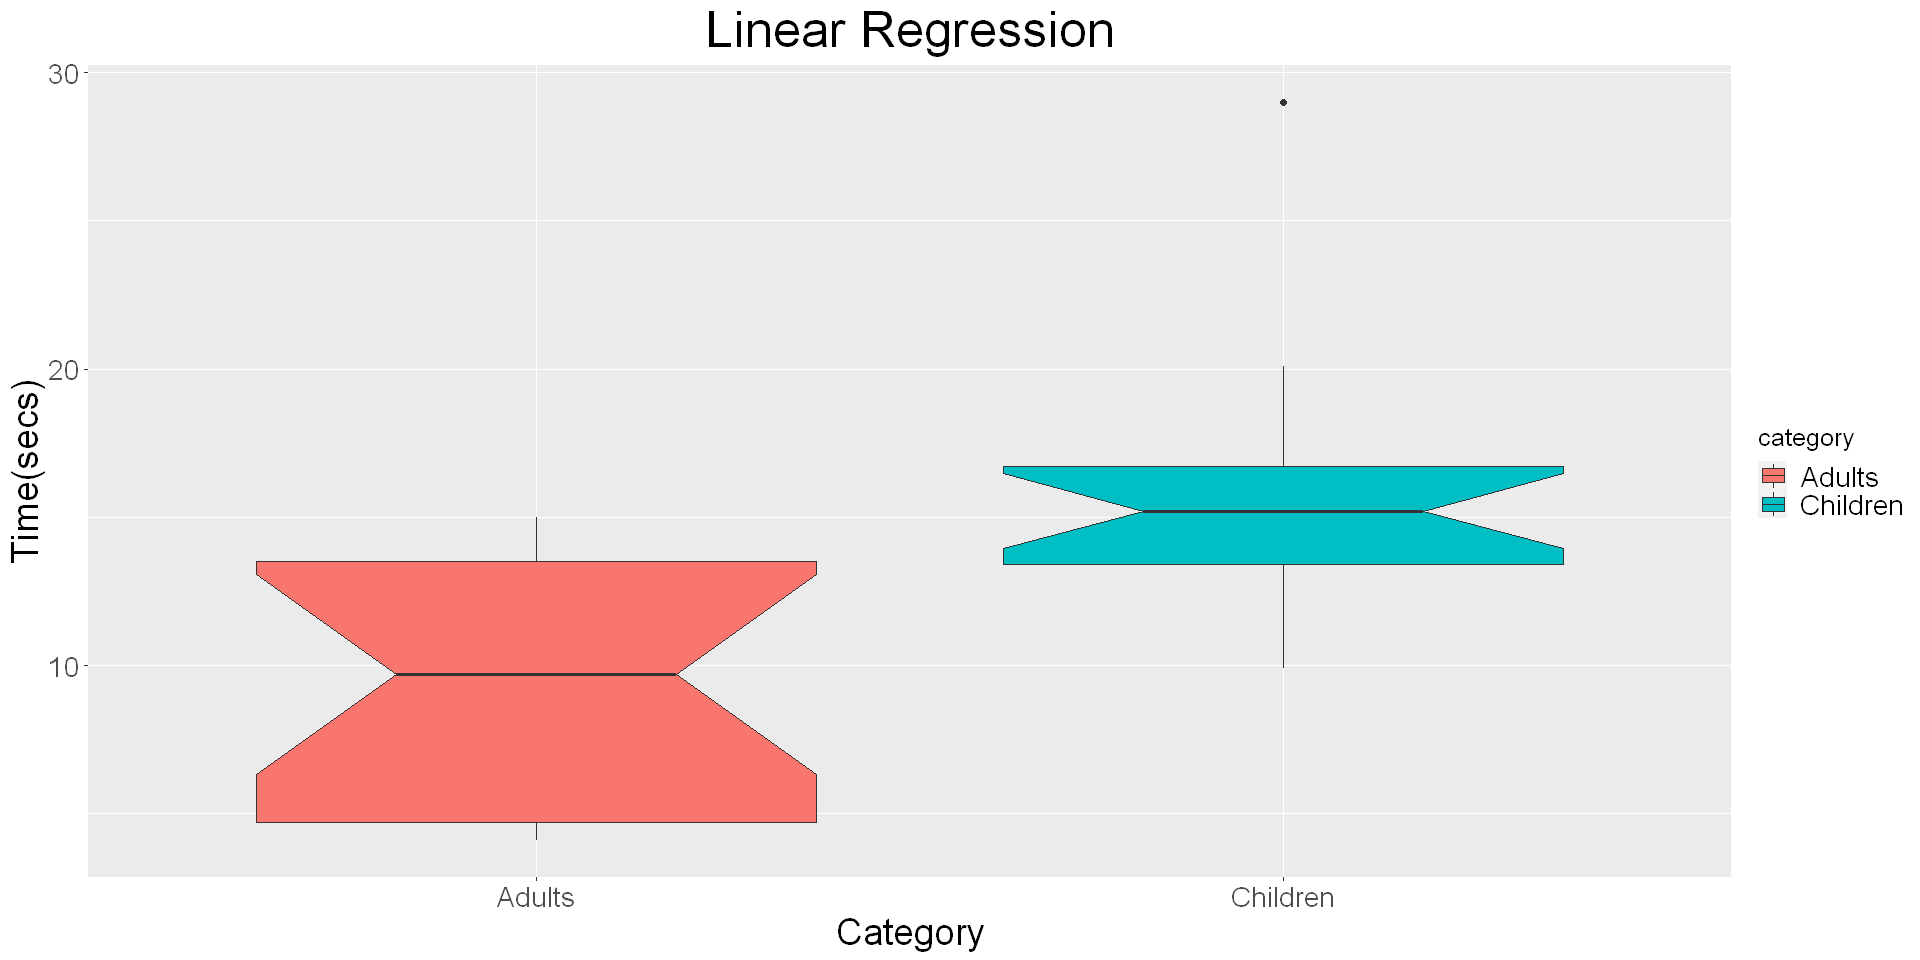

In [7]:
# Outra forma de apresentação do boxplot, usando um notch
plt + geom_boxplot(notch = TRUE) + my.titles + my.theme

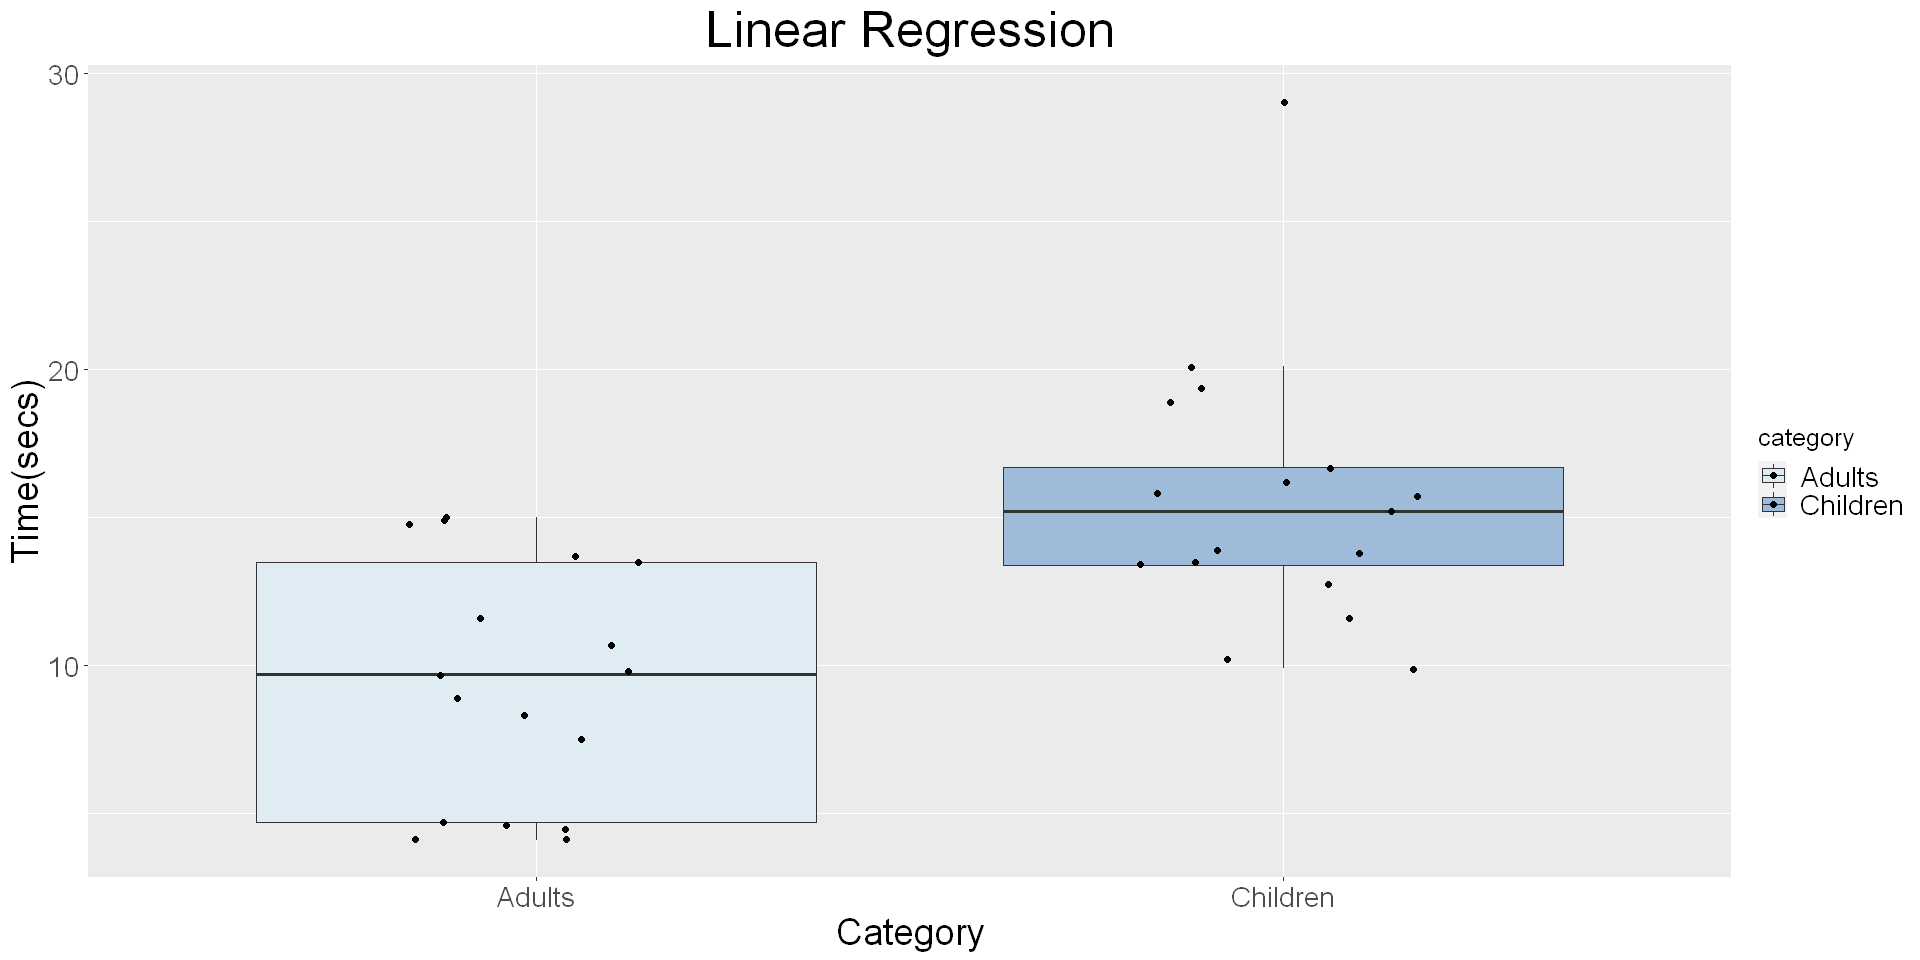

In [8]:
# Pode-se representar uma distribuição pontos sobre o boxplot, os 'jitters'
plt + 
geom_boxplot(outlier.shape = NA) + 
geom_jitter(width = 0.2) + # para mostrar os pontos
scale_fill_brewer(palette="BuPu") + # sobrepoe a paleta de cores default
my.titles + my.theme

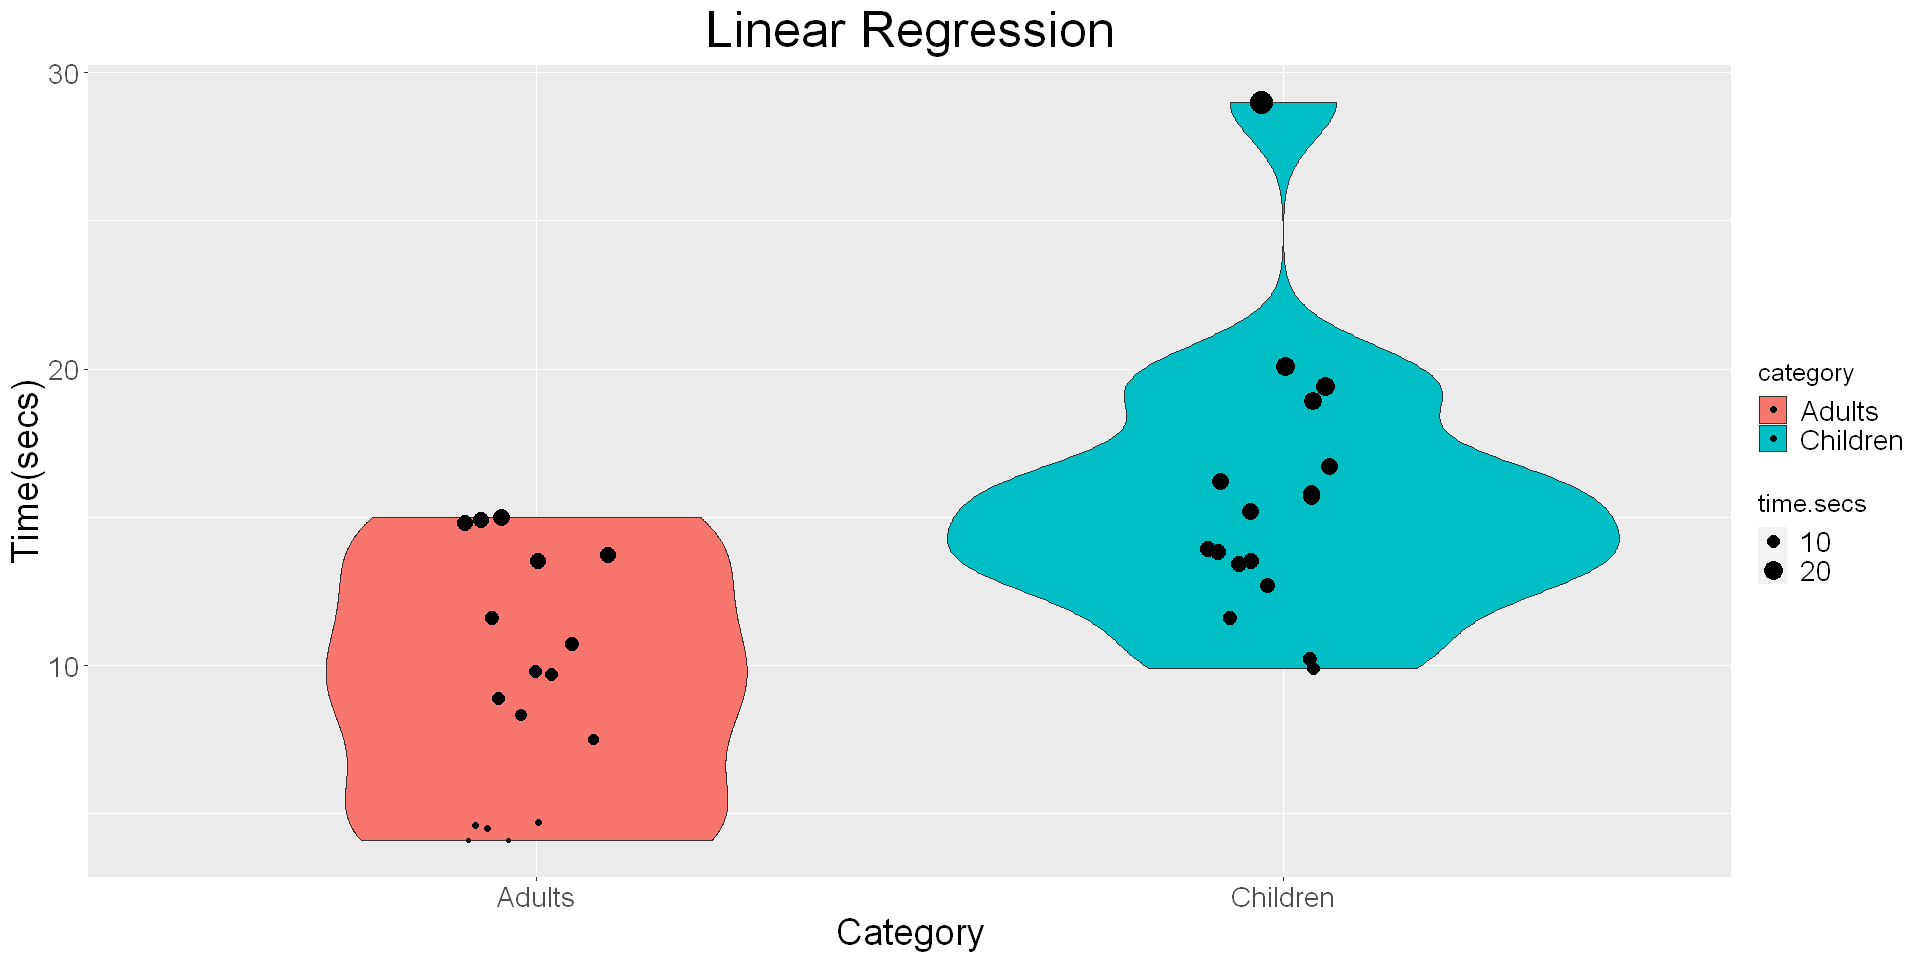

In [9]:
# Plotanto os pontos 'jitters' com o gráfico 'violin'
plt + 
geom_violin() + 
geom_jitter(
    height = 0, 
    width = 0.1, 
    aes(size = time.secs)) + # pode-se inclusive definir o tamanho dos pontos
my.titles + my.theme

## Referências

Este notebook contém exemplos do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)** disponibilizado pelo [The Council for Six Sigma Certification](https://www.sixsigmacouncil.org/six-sigma-training-material/)

Consulte:
* [Sthda-BoxPlot](http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization)
* [R Graph Gallery-BoxPlot](https://www.r-graph-gallery.com/boxplot.html)
* [GG Plot-BoxPlot](https://ggplot2.tidyverse.org/reference/geom_boxplot.html)